In [1]:
#  Task 4
import cv2 as cv #importing the open cv module

In [1]:
video_location = 0   # specify the video location  as webcam
try:
    capture = cv.VideoCapture(video_location)   # reads the video into a capture object 

    while True:
        isTrue, frame = capture.read()  # reads the video frame by frame, isTrue is boolean that stores the read status(boolean)
        cv.imshow(winname='Sample Video', mat=frame) # show images frame by frame 
        if cv.waitKey(20) & 0xFF == ord('x'):        # press the 'x' key to close the window 
            break
    capture.release()      # release the capture pointer
    cv.destroyAllWindows() # clear all memory resources  
except:
    print('Error :(')

Error :(


In [4]:
import numpy as np
video_location = 0   # specify the video location  as webcam

try:
    capture = cv.VideoCapture(video_location)
    image = cv.imread(video_location) 
    while True:
        isTrue, frame = capture.read()  # reads the video frame by frame, isTrue is boolean that stores the read status(boolean)
        cv.imshow(winname='Sample Video', mat=frame) # show images frame by frame 
        if cv.waitKey(20) & 0xFF == ord('x'):        # press the 'x' key to close the window 
            break
    capture.release()      # release the capture pointer
    cv.destroyAllWindows() # clear all memory resources  

    image = cv.resize(image, (1920//2, 1080//2), interpolation=cv.INTER_AREA)
    image_b,image_g,image_r = cv.split(image)  # channel split

    # merging 
    blank_image = np.zeros(image.shape[:2], dtype='uint8')
    image_b = cv.merge([image_b, blank_image, blank_image])
    image_g = cv.merge([blank_image, image_g, blank_image])
    image_r = cv.merge([blank_image, blank_image, image_r])


    cv.imshow('original', image)
    cv.imshow('Blue', image_b)
    cv.imshow('Green', image_g)
    cv.imshow('Red', image_r) 

    cv.waitKey(0)
except:
    print('Error...')

Error...


In [5]:
import numpy as np
import cv2 

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    width = int(cap.get(3))
    height = int(cap.get(4))

    image = np.zeros(frame.shape, np.uint8)
    smaller_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    image[:height//2, :width//2] = smaller_frame
    image[height//2:, :width//2] = smaller_frame
    image[:height//2, width//2:] = smaller_frame
    image[height//2:, width//2:] = smaller_frame


    cv2.imshow(winname='Original', mat=frame)

    if cv2.waitKey(1) == ord('x'):
        break
cap.release() 
cv2.destroyAllWindows()   

In [1]:
import cv2 as cv
import numpy as np

image_size = (720,1280,3)  # define the image size with color depth of 3 channel

blank_matrix = np.zeros(image_size, dtype='uint8') # create a 8-bit unsigned integer matrix 

cv.putText(img=blank_matrix, 
           org=(300, 50),         # origin point 
           text='Test Shapes',    # text to print 
           color=(255,255,0),     # Text color
           fontFace=cv.FONT_HERSHEY_PLAIN, # font to use
           fontScale=2)           # font size 



height, width, depth = image_size



# coloring image segments
blank_matrix[0 : height//2 , 0 : width//2] = 255,0,0   # top left quarter 
blank_matrix[0 : height//2 , width//2+1 : width] = 0,255,0   # top right quarter 
blank_matrix[height//2+1 : height , 0 : width//2] = 0,0,255   # bottom left quarter
blank_matrix[height//2+1 : height , width//2+1 : width] = 255,0,255   # bottom left quarter  

try:
    cv.imshow(winname='blank_image', mat=blank_matrix)
    cv.waitKey(0)
except:
    print('Error')

In [3]:
# Task 3 - framerate, brightness, contrast, saturation
from IPython.display import clear_output

def show_details(capture):   # prints the basic attributes 
    clear_output(wait=True)  # clear the notebook cell after printing 
    
    print(f"CAP_PROP_FPS        \t: {capture.get(cv.CAP_PROP_FPS)}")
    print(f"CAP_PROP_BRIGHTNESS \t: {capture.get(cv.CAP_PROP_BRIGHTNESS)}")
    print(f"CAP_PROP_CONTRAST   \t: {capture.get(cv.CAP_PROP_CONTRAST)}")
    print(f"CAP_PROP_SATURATION \t: {capture.get(cv.CAP_PROP_SATURATION)}")
   
def show_video(source): 
    capture = cv.VideoCapture(source)
    while True:
        isTrue, frame = capture.read()
        show_details(capture)   # calling the capture details 
        cv.imshow('Window', frame)
        if cv.waitKey(20) & 0xFF == ord('x'): # press 'x' to exit the window
            break
    capture.release()
    cv.destroyAllWindows()
show_video(source=0) # calling the live capture

CAP_PROP_FPS        	: 30.0
CAP_PROP_BRIGHTNESS 	: 0.0
CAP_PROP_CONTRAST   	: 16.0
CAP_PROP_SATURATION 	: 64.0


In [2]:
## set params
alter_param = {
    'fps' : 30, 
    'brightness' : 50,
    'contrast' : 10,
    'saturation' : 100,
}
# sourcecode
from IPython.display import clear_output

def show_details(capture):   # prints the basic attributes 
    clear_output(wait=True)  # clear the notebook cell after printing 
    print(f"CAP_PROP_FPS        \t: {capture.get(cv.CAP_PROP_FPS)}")
    print(f"CAP_PROP_BRIGHTNESS \t: {capture.get(cv.CAP_PROP_BRIGHTNESS)}")
    print(f"CAP_PROP_CONTRAST   \t: {capture.get(cv.CAP_PROP_CONTRAST)}")
    print(f"CAP_PROP_SATURATION \t: {capture.get(cv.CAP_PROP_SATURATION)}")

def alter_params(capture, alter_param):   # alters the parameters 
    capture.set(cv.CAP_PROP_FPS, alter_param['fps'])
    capture.set(cv.CAP_PROP_BRIGHTNESS, alter_param['brightness'])
    capture.set(cv.CAP_PROP_CONTRAST, alter_param['contrast'])
    capture.set(cv.CAP_PROP_SATURATION, alter_param['saturation'])
    return capture

def show_video(source):    # renders the video stream 
    print('Preparing capture... ')
    try:
        capture = cv.VideoCapture(source)
        capture = alter_params(capture, alter_param) # calling to alter the params
        print('Displaying... ')
        while True:
            isTrue, frame = capture.read()
            show_details(capture)   # calling the capture details 
            cv.imshow('Window', frame)
            if cv.waitKey(20) & 0xFF == ord('d'): # press 'd' to exit
                break
        capture.release()
    except:
        print('Error')
    finally:
        cv.destroyAllWindows()
show_video(source=0)

CAP_PROP_FPS        	: 30.0
CAP_PROP_BRIGHTNESS 	: 50.0
CAP_PROP_CONTRAST   	: 10.0
CAP_PROP_SATURATION 	: 100.0


In [2]:
# Task 2
import cv2 as cv

def scale_frame(frame, scale):
    # read the actual height and weight, scale it and store
    height = int(frame.shape[0]*scale)
    width = int(frame.shape[1]*scale)
    
    #return the scaled frame
    return cv.resize(frame, (width, height), interpolation=cv.INTER_AREA) # performs rescaling by inte

In [3]:
def read_video(source, scale, side_by_side=False):
    if scale != 1 and scale > 0:   
        try:
            capture = cv.VideoCapture(source)
            while True:
                isTrue, frame = capture.read()
                scaled_frame = scale_frame(frame, scale)  # calls the scale_frame function to scale each frame 
                
                cv.imshow('scaled video', scaled_frame)
                if side_by_side:
                    cv.imshow('original video', frame)
                
                if cv.waitKey(20) & 0XFF == ord('d'):
                    break
            capture.release()
        except:
            print('error')
        finally:
            cv.destroyAllWindows()
    else:
        print(f'The scale factor {scale} is not valid !!')

In [4]:
read_video(source=0, scale=2, side_by_side=True) # calling read_video with live feed, scaling 2X and p

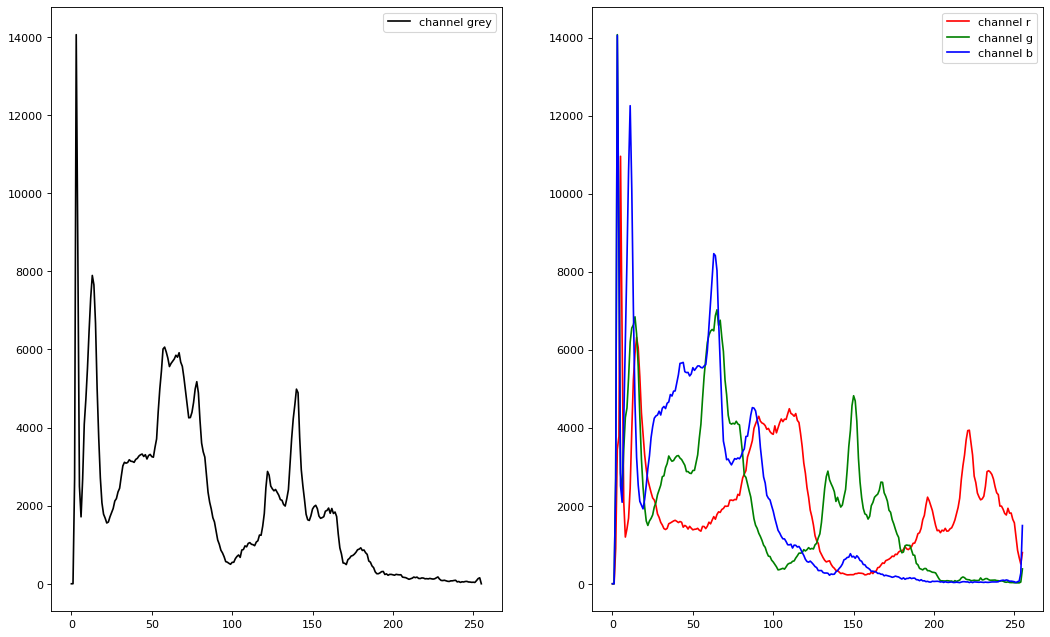

In [6]:
# Task 1
import matplotlib.pyplot as plt
import matplotlib
import cv2 as cv

plt.figure(figsize=(16, 10), dpi=80)

image_path = 'Images and Videos/Hand and phone.png'
ax_grey = plt.subplot(1,2,1)  # row 1, col 1
ax_rgb  = plt.subplot(1,2,2)  # row 1, col 2


image_bgr = cv.imread(image_path)    # default BGR 

image_bgr = cv.resize(image_bgr, (1920//2, 1080//2),cv.INTER_AREA) ## resing to fit 4 pics in screen 

image_grey = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)# BGP --> Grey 
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB) # BGR --> RGB

#gray scale histogram 
gray_hist = cv.calcHist(images=[image_grey], channels=[0], mask=None, histSize=[256], ranges=[0,256])

ax_grey.set_title='Gray Scale'


ax_grey.plot(gray_hist, color='black', label='channel grey')
ax_grey.legend()

# bgr histogram 
ax_grey.set_title='RGB Scale'


channels = ('r','g', 'b')
for i, color in enumerate(channels):
    bgr_hist = cv.calcHist(images=[image_bgr], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    ax_rgb.plot(bgr_hist, color=color, label = f'channel {color}')
    ax_rgb.legend()

plt.show()